<a href="https://colab.research.google.com/github/thcesarc/UnivariateSimpleLinearRegression/blob/main/SimpleLinearRegression_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from   scipy.linalg import lstsq
from   sklearn.metrics import r2_score

###Loading, selecting and splitting dataset

In [26]:
#loading
full_dataset = pd.read_csv('Summary of Weather.csv', low_memory=False)

In [27]:
#selection filter: select all dataframe rows in which the 'STA' (station) feature column is equals to the paris station code (34022)
paris_filter = full_dataset['STA'] == 34022

In [28]:
#split the dataset
minimum_temperatures = full_dataset[paris_filter].loc[:,'MinTemp'].values
maximum_temperatures = full_dataset[paris_filter].loc[:,'MaxTemp'].values

###Data transformation


In [29]:
minimum_temperatures_transformed = minimum_temperatures.reshape(-1,1)**[0,1] #mess around with the elements of the expoent list to understand what it is being done here
minimum_temperatures_transformed[:10]
#scipy.linalg.lstqs() requires data in this format 

array([[ 1.        ,  7.77777778],
       [ 1.        ,  4.44444444],
       [ 1.        ,  2.22222222],
       [ 1.        ,  4.44444444],
       [ 1.        ,  2.22222222],
       [ 1.        ,  6.11111111],
       [ 1.        ,  9.44444444],
       [ 1.        , 10.        ],
       [ 1.        ,  8.88888889],
       [ 1.        ,  9.44444444]])

###Fitting data

In [30]:
hyperparameters,_,_,_ =lstsq(minimum_temperatures_transformed, maximum_temperatures)
print(hyperparameters)

[7.89836196 1.23809106]


###Defining function for prediction

In [31]:
def predict(x_set, hp=hyperparameters):
  w0 = hp[0]
  w1 = hp[1]
  return w0 + w1*x_set

###Prediction

In [32]:
predicted = predict(minimum_temperatures)

###R² coefficient

In [33]:
score = r2_score(maximum_temperatures, predicted)
print("{0:.2f}% of the data is well explained by the model.".format(score*100))

77.57% of the data is well explained by the model.


###Visualizing data

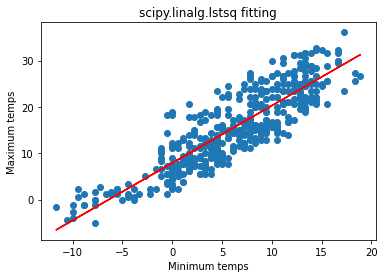

In [34]:
plt.scatter(minimum_temperatures, maximum_temperatures)
plt.plot(minimum_temperatures, predicted_set, color='red')
plt.title('scipy.linalg.lstsq fitting')
plt.xlabel('Minimum temps')
plt.ylabel('Maximum temps')
plt.show()
